Unlike the other motifbreakR run we wanted to know what motifs are enriched by lead variants of caQTLs with the association outside of the peak

In [1]:
suppressPackageStartupMessages(library(motifbreakR))
suppressPackageStartupMessages(library(MotifDb))
suppressPackageStartupMessages(library(BSgenome))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library("BSgenome.Hsapiens.UCSC.hg38"))
suppressPackageStartupMessages(library(motifStack))
suppressPackageStartupMessages(library(data.table))
library(stringr)
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(ggplot2))
#library(MotIV) ###(only with older versions on R (in gatsby) )
library(scales)
library(vroom)
library(parallel)

See system.file("LICENSE", package="MotifDb") for use restrictions.


Attaching package: 'vroom'


The following object is masked from 'package:scales':

    col_factor




In [2]:
setwd('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/motifs')

In [4]:
leadvars = vroom('../caQTLs_rasqual/Summary_allCells_leads_run1F.tsv')

Rows: 773267 Columns: 34
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, cell, feature_snp
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (5): flag_fdr10, flag_fdr05, flag_fdr01, exclude, qtl

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
dim(leadvars)
head(leadvars)

[1] 773267     34

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6929401:T:A
chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr4:7164816-7165698_chr4:7160692:T:C
chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:93230239-93231938_chr9:93231475:G:A
chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr17:76968760-76970675_chr17:76972946:C:A
chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr21:13979625-13980808_chr21:13980560:G:C


### 1 All leads

In [6]:
dim(leadvars)
head(leadvars)

[1] 773267     34

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,cell,exclude,qtl,feature_snp
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr6:32622377-32623439_chr6:32620608:T:A
chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:6931452-6932441_chr9:6929401:T:A
chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr4:7164816-7165698_chr4:7160692:T:C
chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr9:93230239-93231938_chr9:93231475:G:A
chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr17:76968760-76970675_chr17:76972946:C:A
chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,acinar,FALSE,TRUE,chr21:13979625-13980808_chr21:13980560:G:C


In [8]:
sum(leadvars$flag_fdr05)
#sum(leadvars$flag_fdr05) #Run4: 10595

leadvars_sig <- leadvars[leadvars$flag_fdr05,]

[1] 26185

In [9]:
spt = str_split_fixed(leadvars_sig$rsID, "\\:", 4)
newinps = data.frame(spt[,1], as.numeric(spt[,2])-1, spt[,2], leadvars_sig$rsID, 0, "+" )
newinps = newinps[!duplicated(newinps),]
dim(newinps) #Run4: 361264

[1] 20622     6

In [10]:
options(scipen=10)
write.table( newinps, "Input_leadvars_list_all_sig_leads_Run1F.tsv", sep="\t", quote=F, row.names=F, col.names=F, )
options(scipen=0)

##### Run motifbreakR

In [11]:
hocomoco2 = MotifDb[mcols(MotifDb)$dataSource=='HOCOMOCOv10' & mcols(MotifDb)$organism=='Hsapiens']
jaspar = MotifDb[mcols(MotifDb)$dataSource=='jaspar2022' & mcols(MotifDb)$organism=='Hsapiens']

snps <- snps.from.file(file = "Input_leadvars_list_all_sig_leads_Run1F.tsv",search.genome = BSgenome.Hsapiens.UCSC.hg38,format = "bed")                                 
n = length(snps)
s =seq(1, n, by=200)
end = s[length(s)-1]
e =c(seq(200, n, by=200),n)

In [12]:
for (i in seq(1:length(s))){
    test=snps[s[i]:e[i]]
    results <- mclapply(1:length(test), function(x) data.frame(motifbreakR(snpList = test[x], filterp = TRUE,
                       pwmList = hocomoco2,
                       method="ic",
                       threshold = 5e-4,
                       BPPARAM = BiocParallel::bpparam("SerialParam"))), mc.cores=18 )
    results2 <- mclapply(1:length(test), function(x) data.frame(motifbreakR(snpList = test[x], filterp = TRUE,
                       pwmList = jaspar,
                       method="ic",
                       threshold = 5e-4,
                       BPPARAM = BiocParallel::bpparam("SerialParam"))), mc.cores=18 )

    rb = rbindlist(results[lapply(results, class) == "data.frame"])
    rb2 = rbindlist(results2[lapply(results, class) == "data.frame"])
                         
    rb$motifPos2 <- sapply(rb$motifPos,"[[",2)
    rb$motifPos <- sapply(rb$motifPos,"[[",1)
                         
    rb2$motifPos2 <- sapply(rb2$motifPos,"[[",2)
    rb2$motifPos <- sapply(rb2$motifPos,"[[",1)

    if(nrow(rb2)>0){
      write.table(rb, paste0("hocomoco/all_sig_leads_Run1F/Results_Hocomoco_", s[i], "_", e[i], ".tsv"), quote=F, row.names=F, sep="\t") 
      write.table(rb2,  paste0("jaspar/all_sig_leads_Run1F/Results_JASPAR2022_", s[i], "_", e[i], ".tsv"), quote=F, row.names=F, sep="\t")  
    }
    message(paste0(i, " out of ", length(s)))
                        
    gc()
}   

1 out of 104

2 out of 104

3 out of 104

4 out of 104

5 out of 104

6 out of 104

7 out of 104

8 out of 104

9 out of 104

10 out of 104

11 out of 104

12 out of 104

13 out of 104

14 out of 104

15 out of 104

16 out of 104

17 out of 104

18 out of 104

19 out of 104

20 out of 104

21 out of 104

22 out of 104

23 out of 104

24 out of 104

25 out of 104

26 out of 104

27 out of 104

28 out of 104

29 out of 104

30 out of 104

31 out of 104

32 out of 104

33 out of 104

34 out of 104

35 out of 104

36 out of 104

37 out of 104

38 out of 104

39 out of 104

40 out of 104

41 out of 104

42 out of 104

43 out of 104

44 out of 104

45 out of 104

46 out of 104

47 out of 104

48 out of 104

49 out of 104

50 out of 104

51 out of 104

52 out of 104

53 out of 104

54 out of 104

55 out of 104

56 out of 104

57 out of 104

58 out of 104

59 out of 104

60 out of 104

61 out of 104

62 out of 104

63 out of 104

64 out of 104

65 out of 104

66 out of 104

67 out of 104

68 o

### Compile results

In [13]:
files = list.files('jaspar/all_sig_leads_Run1F')[grepl("Results_JASPAR2022", list.files('jaspar/all_sig_leads_Run1F'))]

In [14]:
length(files)

[1] 104

In [16]:
RES = data.frame()
for( f in files){
    res = read.table(paste0('jaspar/all_sig_leads_Run1F/',f),  row.names=NULL, header=T, sep="\t", stringsAsFactors = F)
    RES = rbind(RES, res)
}

tab = RES[, c(6,10:21, 26,27,25)]
tab = tab[order(-abs(tab$alleleDiff)),]
tab = tab[!duplicated(tab[,c('SNP_id','geneSymbol' )]),]

dim(tab) #Run4 381113x16

write.table(tab, "Summary_motifs_JASPAR2022_all_sig_leads_Run1F.tsv", sep="\t", row.names=F, quote=F)

strong = subset(tab,effect=="strong" )

[1] 211941     16

In [17]:
write.table(strong, "Summary_motifs_JASPAR2022_strong_all_sig_leads_Run1F.tsv", sep="\t", row.names=F, quote=F)

##  Enrichment Test

We got a little lost on all this enrichment testing, I am going to remake the cell type test

In [18]:
motifs <- read.table("/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/motifs/Summary_motifs_JASPAR2022_all_sig_leads_Run1F.tsv", sep="\t", header=T)
dim(motifs)
head(motifs)

[1] 211941     16

,SNP_id,motifPos,geneSymbol,dataSource,providerName,providerId,seqMatch,pctRef,pctAlt,scoreRef,scoreAlt,Refpvalue,Altpvalue,altPos,alleleDiff,effect
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<dbl>,<chr>
1,chr6:29680600:T:C,-1,TCFL5,jaspar2022,MA0632.2,MA0632.2,gccctgtccCccgcgctta,0.7131549,0.9046364,7.539695,9.539586,NA,NA,1,1.999892,strong
2,chr5:177481730:A:C,-1,TCFL5,jaspar2022,MA0632.2,MA0632.2,gtgtgagtcCccgtgccca,0.6833266,0.8748082,7.228160,9.228051,NA,NA,1,1.999892,strong
3,chr1:223269331:T:G,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,aaggcacgtGtataggaga,0.7006581,0.8921397,7.409175,9.409067,NA,NA,1,1.999892,strong
4,chr22:38927250:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,gtggcgcgaGcctggtgcc,0.9204063,0.7289248,9.704292,7.704401,NA,NA,1,-1.999892,strong
5,chr11:64271703:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,cgagcgcgaGcggccccga,0.9447054,0.7532239,9.958080,7.958188,NA,NA,1,-1.999892,strong
6,chr19:53512517:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,agggcccgcGgggagctct,0.8728179,0.6813363,9.207264,7.207372,NA,NA,1,-1.999892,strong


In [19]:
strong <- read.table("/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/motifs/Summary_motifs_JASPAR2022_strong_all_sig_leads_Run1F.tsv", sep="\t", header=T)
dim(strong)
head(strong)

[1] 187562     16

,SNP_id,motifPos,geneSymbol,dataSource,providerName,providerId,seqMatch,pctRef,pctAlt,scoreRef,scoreAlt,Refpvalue,Altpvalue,altPos,alleleDiff,effect
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<dbl>,<chr>
1,chr6:29680600:T:C,-1,TCFL5,jaspar2022,MA0632.2,MA0632.2,gccctgtccCccgcgctta,0.7131549,0.9046364,7.539695,9.539586,NA,NA,1,1.999892,strong
2,chr5:177481730:A:C,-1,TCFL5,jaspar2022,MA0632.2,MA0632.2,gtgtgagtcCccgtgccca,0.6833266,0.8748082,7.228160,9.228051,NA,NA,1,1.999892,strong
3,chr1:223269331:T:G,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,aaggcacgtGtataggaga,0.7006581,0.8921397,7.409175,9.409067,NA,NA,1,1.999892,strong
4,chr22:38927250:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,gtggcgcgaGcctggtgcc,0.9204063,0.7289248,9.704292,7.704401,NA,NA,1,-1.999892,strong
5,chr11:64271703:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,cgagcgcgaGcggccccga,0.9447054,0.7532239,9.958080,7.958188,NA,NA,1,-1.999892,strong
6,chr19:53512517:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,agggcccgcGgggagctct,0.8728179,0.6813363,9.207264,7.207372,NA,NA,1,-1.999892,strong


In [20]:
leads_in_peak_flag <- data.frame()
intersect.dir <- '/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/figures/lead_variant_peak_overlap/'

for (c in c('acinar','alpha','beta','bulk','delta','ductal','gamma')) {
    leads_in_peak_flag <- rbind(leads_in_peak_flag, 
                                vroom(paste0(intersect.dir, c, '_lead_sum_stats_run1F_intersect_flag.tsv'), delim='\t'))
}

dim(leads_in_peak_flag)
head(leads_in_peak_flag)

Rows: 2144 Columns: 32
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, In.Feature, Peak.Intersect.State
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4218 Columns: 32
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (7): Feature, rsID, Chromosome, Ref, Alt, In.Feature, Peak.Intersect.State
dbl (22): position, Af, HWEChi_square, IA, Log10_qval, Chi_square, Effect_si...
lgl  (3): flag_fdr10, flag_fdr05, flag_fdr01

ℹ Use `spec()` to retrieve the full column specification for this 

[1] 26179    32

Feature,rsID,Chromosome,position,Ref,Alt,Af,HWEChi_square,IA,Log10_qval,⋯,Convergence_status,r2_fSNPs,r2_rSNP,P_VAl,dist,flag_fdr10,flag_fdr05,flag_fdr01,In.Feature,Peak.Intersect.State
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
chr6:32622377-32623439,chr6:32620608:T:A,chr6,32620608,T,A,0.425926,2.231991,0.998678,-67.03611,⋯,0,0.991233,0.824496,8.976233e-71,-2300,TRUE,TRUE,TRUE,NA,Not.In.Peak
chr9:6931452-6932441,chr9:6929401:T:A,chr9,6929401,T,A,0.333333,0.750000,0.993936,-36.60879,⋯,0,0.977371,0.985795,1.925609e-38,-2545,TRUE,TRUE,TRUE,NA,Not.In.Peak
chr4:7164816-7165698,chr4:7160692:T:C,chr4,7160692,T,C,0.277778,0.006391,0.999935,-32.46831,⋯,0,0.988775,0.902371,1.502522e-34,-4565,TRUE,TRUE,TRUE,chr4:7160139-7160834,In.Other.Peak
chr9:93230239-93231938,chr9:93231475:G:A,chr9,93231475,G,A,0.222222,0.137755,0.999392,-30.83427,⋯,0,0.988759,0.992117,3.105136e-32,387,TRUE,TRUE,TRUE,chr9:93230239-93231938,In.caQTL.Peak
chr17:76968760-76970675,chr17:76972946:C:A,chr17,76972946,C,A,0.296296,0.337734,0.980182,-29.73370,⋯,0,0.985793,0.940828,4.969777e-32,3228,TRUE,TRUE,TRUE,NA,Not.In.Peak
chr21:13979625-13980808,chr21:13980560:G:C,chr21,13980560,G,C,0.314815,0.083599,0.930667,-27.70426,⋯,0,0.891880,0.870565,7.793799e-30,344,TRUE,TRUE,TRUE,chr21:13979625-13980808,In.caQTL.Peak


In [29]:
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:Biostrings':

    collapse, intersect, setdiff, setequal, union


The following object is masked from 'package:XVector':

    slice


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:b

In [53]:
length(unique(leads_in_peak_flag$rsID))
leads_in_peak_flag$Not.In.Peak <- FALSE
leads_in_peak_flag[leads_in_peak_flag$Peak.Intersect.State == 'Not.In.Peak',]$Not.In.Peak <- TRUE
leads_in_peak_flag_distict <- select(leads_in_peak_flag, rsID, Not.In.Peak) %>% 
    distinct()

dim(leads_in_peak_flag_distict)
head(leads_in_peak_flag_distict)

[1] 20618

[1] 20618     2

rsID,Not.In.Peak
<chr>,<lgl>
chr6:32620608:T:A,TRUE
chr9:6929401:T:A,TRUE
chr4:7160692:T:C,FALSE
chr9:93231475:G:A,FALSE
chr17:76972946:C:A,TRUE
chr21:13980560:G:C,FALSE


In [54]:
motifs_in_peaks <- left_join(motifs, leads_in_peak_flag_distict, join_by(SNP_id == rsID))
sum(is.na(motifs_in_peaks$Not.In.Peak))
motifs_in_peaks <- motifs_in_peaks[!is.na(motifs_in_peaks$Not.In.Peak),]

dim(motifs)
dim(motifs_in_peaks)
head(motifs_in_peaks)

[1] 19

[1] 211941     17

[1] 211922     18

,SNP_id,motifPos,geneSymbol,dataSource,providerName,providerId,seqMatch,pctRef,pctAlt,scoreRef,scoreAlt,Refpvalue,Altpvalue,altPos,alleleDiff,effect,disrupted,Not.In.Peak
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<dbl>,<chr>,<lgl>,<lgl>
1,chr6:29680600:T:C,-1,TCFL5,jaspar2022,MA0632.2,MA0632.2,gccctgtccCccgcgctta,0.7131549,0.9046364,7.539695,9.539586,NA,NA,1,1.999892,strong,TRUE,FALSE
2,chr5:177481730:A:C,-1,TCFL5,jaspar2022,MA0632.2,MA0632.2,gtgtgagtcCccgtgccca,0.6833266,0.8748082,7.228160,9.228051,NA,NA,1,1.999892,strong,TRUE,FALSE
3,chr1:223269331:T:G,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,aaggcacgtGtataggaga,0.7006581,0.8921397,7.409175,9.409067,NA,NA,1,1.999892,strong,TRUE,TRUE
4,chr22:38927250:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,gtggcgcgaGcctggtgcc,0.9204063,0.7289248,9.704292,7.704401,NA,NA,1,-1.999892,strong,TRUE,FALSE
5,chr11:64271703:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,cgagcgcgaGcggccccga,0.9447054,0.7532239,9.958080,7.958188,NA,NA,1,-1.999892,strong,TRUE,FALSE
6,chr19:53512517:G:A,-8,TCFL5,jaspar2022,MA0632.2,MA0632.2,agggcccgcGgggagctct,0.8728179,0.6813363,9.207264,7.207372,NA,NA,1,-1.999892,strong,TRUE,FALSE


In [49]:
library(qvalue)

In [56]:
motifs_in_peaks$disrupted <- TRUE
motifs_wide <- select(motifs_in_peaks, SNP_id, geneSymbol, disrupted, Not.In.Peak) %>%
    group_by(SNP_id) %>%
    pivot_wider(names_from=geneSymbol, values_from=disrupted, values_fill=FALSE)
#motifs_wide

full.res <- data.frame()

for (test.motif in colnames(motifs_wide)[3:ncol(motifs_wide)]) {
    test.res <- broom::tidy(fisher.test(table(motifs_wide[c(test.motif,'Not.In.Peak')])))
    test.res$motif <- test.motif
    full.res <- rbind(full.res, test.res)
}

full.res[full.res$p.value > 1,]$p.value <- 1
full.res[full.res$p.value < 0,]$p.value <- 0
full.res$q.value <- qvalue(full.res$p.value)$qvalues
full.res <- arrange(full.res, q.value)

dim(full.res)
head(full.res)

[1] 645   8

estimate,p.value,conf.low,conf.high,method,alternative,motif,q.value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0.1202465,6.917519e-118,0.09536648,0.1501350,Fisher's Exact Test for Count Data,two.sided,FOS::JUND,1.575772e-115
0.1260874,1.205246e-115,0.10057330,0.1566645,Fisher's Exact Test for Count Data,two.sided,FOSL1,1.372741e-113
0.1779378,7.420940e-114,0.14924302,0.2112057,Fisher's Exact Test for Count Data,two.sided,JUNB,5.634827e-112
0.1220533,1.176406e-110,0.09630612,0.1531643,Fisher's Exact Test for Count Data,two.sided,BATF,5.359573e-109
0.1220533,1.176406e-110,0.09630612,0.1531643,Fisher's Exact Test for Count Data,two.sided,BNC2,5.359573e-109
0.1279968,5.514061e-109,0.10157706,0.1597739,Fisher's Exact Test for Count Data,two.sided,BATF::JUN,2.093453e-107


In [57]:
filter(full.res, q.value < 0.05)

estimate,p.value,conf.low,conf.high,method,alternative,motif,q.value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
0.1202465,6.917519e-118,0.09536648,0.1501350,Fisher's Exact Test for Count Data,two.sided,FOS::JUND,1.575772e-115
0.1260874,1.205246e-115,0.10057330,0.1566645,Fisher's Exact Test for Count Data,two.sided,FOSL1,1.372741e-113
0.1779378,7.420940e-114,0.14924302,0.2112057,Fisher's Exact Test for Count Data,two.sided,JUNB,5.634827e-112
0.1220533,1.176406e-110,0.09630612,0.1531643,Fisher's Exact Test for Count Data,two.sided,BATF,5.359573e-109
0.1220533,1.176406e-110,0.09630612,0.1531643,Fisher's Exact Test for Count Data,two.sided,BNC2,5.359573e-109
0.1279968,5.514061e-109,0.10157706,0.1597739,Fisher's Exact Test for Count Data,two.sided,BATF::JUN,2.093453e-107
0.1354755,3.064571e-106,0.10817388,0.1681324,Fisher's Exact Test for Count Data,two.sided,BATF3,9.972743e-105
0.1442643,5.214161e-105,0.11624424,0.1776353,Fisher's Exact Test for Count Data,two.sided,NFE2,1.484696e-103
0.1252584,2.219043e-103,0.09836226,0.1578630,Fisher's Exact Test for Count Data,two.sided,FOS::JUNB,5.616504e-102


In [58]:
filter(full.res, q.value < 0.05 & estimate > 1)

estimate,p.value,conf.low,conf.high,method,alternative,motif,q.value
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
2.236364,3.537238e-14,1.793180,2.805605,Fisher's Exact Test for Count Data,two.sided,HOXB13,2.120429e-13
2.121726,4.091037e-13,1.711068,2.644912,Fisher's Exact Test for Count Data,two.sided,MEF2C,2.070922e-12
2.466775,1.206855e-11,1.863258,3.300704,Fisher's Exact Test for Count Data,two.sided,ZNF384,5.286823e-11
1.820411,1.803784e-10,1.502730,2.213028,Fisher's Exact Test for Count Data,two.sided,ZNF8,6.848195e-10
1.804739,1.724675e-08,1.457569,2.244533,Fisher's Exact Test for Count Data,two.sided,MEF2A,5.102225e-08
1.741927,2.372837e-07,1.400266,2.176459,Fisher's Exact Test for Count Data,two.sided,POU2F3,6.212860e-07
1.920589,2.703345e-07,1.480159,2.510042,Fisher's Exact Test for Count Data,two.sided,CEBPA,6.997805e-07
1.803249,2.916284e-07,1.426152,2.292166,Fisher's Exact Test for Count Data,two.sided,MEF2D,7.464191e-07
1.685346,3.922252e-07,1.367450,2.085149,Fisher's Exact Test for Count Data,two.sided,PHOX2B,9.818318e-07


In [59]:
write.table(full.res, '240708_Fisher_NotInPeak_motif_enrichment_JASPAR.tsv', 
            sep='\t', col.names=T, row.names=F, quote=F)

In [198]:
getwd()

[1] "/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/motifs"

In [251]:
write.table(full.res, '240708_Fisher_ct_motif_enrichment_JASPAR.tsv', 
            sep='\t', col.names=T, row.names=F, quote=F)

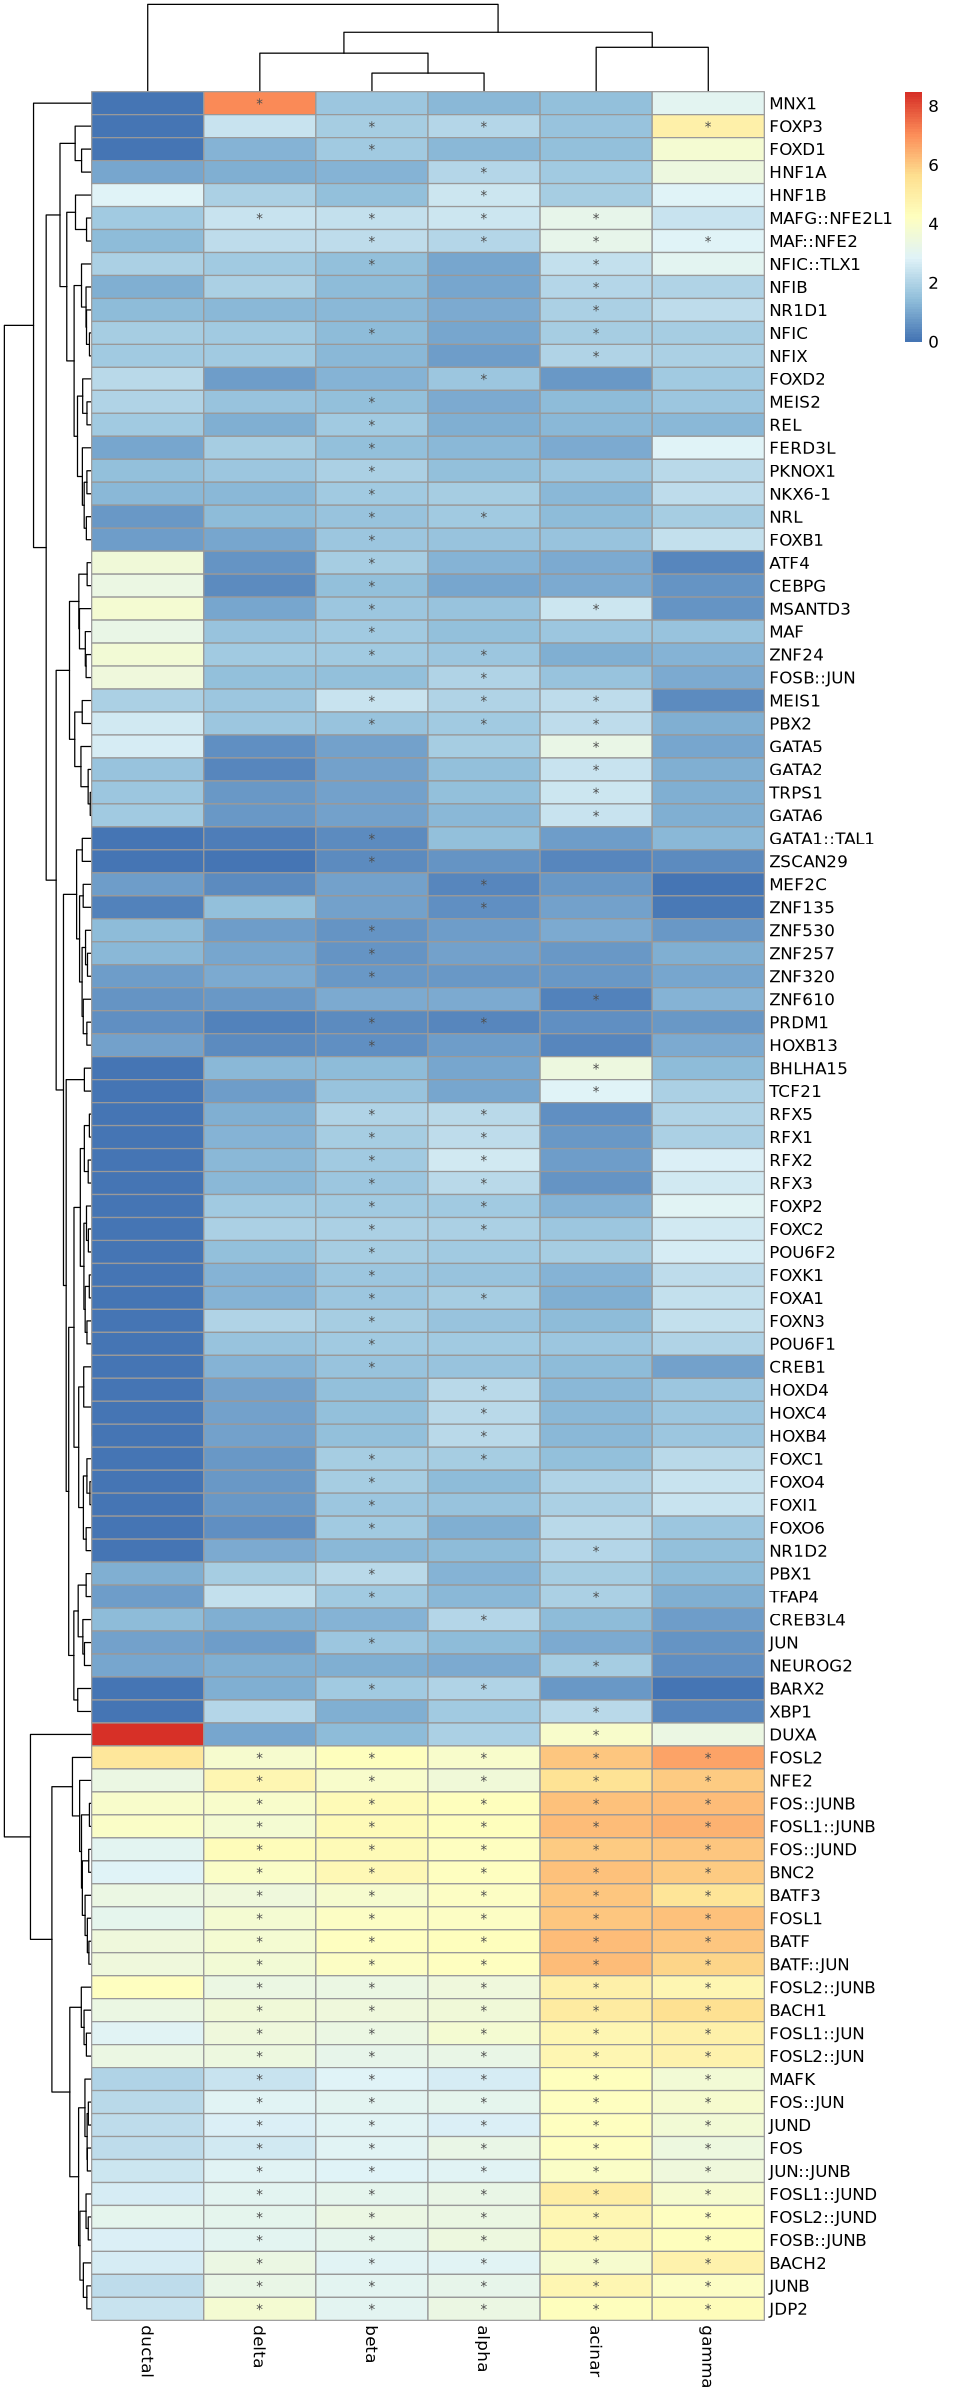

In [255]:
full.res <- read.table('/nfs/lab/welison/islet_multiome/intermediates/caQTLs/231026_WE_caQTLs/motifs/240708_Fisher_ct_motif_enrichment_JASPAR.tsv',
                      header=T, sep='\t')
#full.res

heat_data <- select(full.res, estimate, motif, cell) %>%
    pivot_wider(values_from=estimate, names_from=cell) %>%
    tibble::column_to_rownames(var='motif') %>%
    as.matrix()

#head(heat_data)

heat_lab <- select(full.res, q.value, motif, cell) 
heat_lab$q.value <- heat_lab$q.value < 0.05
heat_lab$lab <- ''
heat_lab$lab[heat_lab$q.value] <- '*'
heat_lab <- select(heat_lab, -q.value)

heat_lab <- pivot_wider(heat_lab, values_from=lab, names_from=cell) %>%
    tibble::column_to_rownames(var='motif') %>%
    as.matrix()

#head(heat_lab)

options(repr.plot.width=8, repr.plot.height=20)
pheatmap(heat_data[unique(filter(full.res, q.value < 0.05)$motif),], scale='none',
        display_numbers =heat_lab[unique(filter(full.res, q.value < 0.05)$motif),])

In [212]:
heat_data <- select(full.res, estimate, motif, cell) %>%
    pivot_wider(values_from=estimate, names_from=cell) %>%
    tibble::column_to_rownames(var='motif') %>%
    as.matrix()

head(heat_data)

,beta,alpha,acinar,ductal,delta,gamma
FOS::JUND,4.420757,4.198283,5.972486,3.025758,4.339476,6.094861
BNC2,4.510413,4.234000,6.111039,2.832029,4.065606,5.957727
FOSL2,4.249562,3.935357,6.083076,5.289823,3.874927,6.641490
FOS::JUNB,4.462689,4.316644,6.126788,3.912057,3.949801,6.201865
FOSL1,4.115597,4.086358,6.109273,3.111783,3.790151,6.135659
BATF,4.183061,4.268944,6.256744,3.540105,3.808892,6.101886


In [214]:
sum(unique(filter(full.res, q.value < 0.05)$motif) %in% rownames(heat_data))
length(unique(filter(full.res, q.value < 0.05)$motif))

[1] 97

[1] 97

In [ ]:
[unique(filter(full.res, q.value < 0.05)$motif),]

In [210]:
unique(filter(full.res, q.value < 0.05)$motif)

[1] "FOS::JUND"    "BNC2"         "FOSL2"        "FOS::JUNB"    "FOSL1"       
 [6] "BATF"         "BATF::JUN"    "FOSL1::JUNB"  "NFE2"         "BACH1"       
[11] "BATF3"        "FOSL1::JUN"   "FOSL2::JUND"  "FOS::JUN"     "JUNB"        
[16] "FOSL2::JUN"   "JDP2"         "JUND"         "FOSL2::JUNB"  "BACH2"       
[21] "FOSB::JUNB"   "FOS"          "JUN::JUNB"    "FOSL1::JUND"  "MAFK"        
[26] "MAFG::NFE2L1" "MAF::NFE2"    "MEIS1"        "PBX1"         "FOXC2"       
[31] "ATF4"         "PKNOX1"       "FOXC1"        "PRDM1"        "TFAP4"       
[36] "ZNF24"        "RFX5"         "FOXP2"        "MAF"          "FOXO4"       
[41] "ZNF530"       "FOXP3"        "RFX1"         "FOXK1"        "FOXN3"       
[46] "MEIS2"        "RFX2"         "POU6F1"       "FOXO6"        "FOXA1"       
[51] "JUN"          "NRL"          "RFX3"         "CEBPG"        "FOXD1"       
[56] "POU6F2"       "MSANTD3"      "ZNF257"       "FOXB1"        "FERD3L"      
[61] "ZNF320"       "CREB1"        "HOXB13"       "BARX2"        "FOXI1"       
[66] "PBX2"         "GATA1::TAL1"  "NFIC"         "NFIC::TLX1"   "NKX6-1"      
[71] "REL"          "ZSCAN29"      "HNF1B"        "CREB3L4"      "HNF1A"       
[76] "MEF2C"        "ZNF135"       "FOXD2"        "FOSB::JUN"    "HOXC4"       
[81] "HOXB4"        "HOXD4"        "DUXA"         "NFIX"         "GATA5"       
[86] "BHLHA15"      "ZNF610"       "NR1D2"        "NFIB"         "GATA2"       
[91] "TRPS1"        "TCF21"        "GATA6"        "NEUROG2"      "XBP1"        
[96] "NR1D1"        "MNX1"

In [202]:
library(pheatmap)

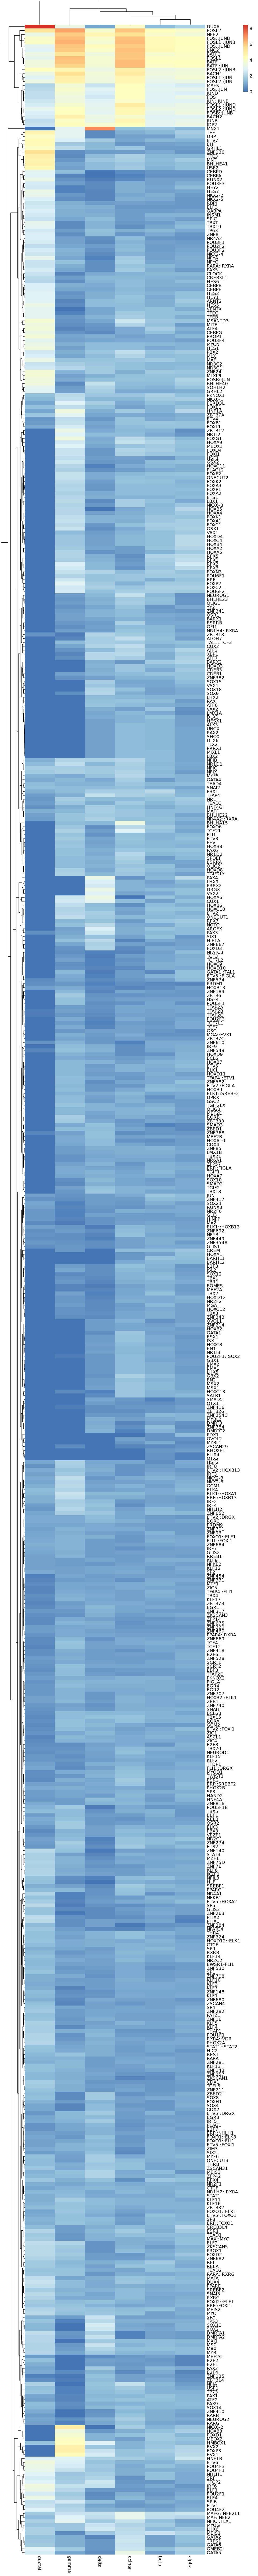

In [207]:
options(repr.plot.width=8, repr.plot.height=80)
pheatmap(select(full.res, estimate, motif, cell) %>%
    pivot_wider(values_from=estimate, names_from=cell) %>%
    tibble::column_to_rownames(var='motif') %>%
    as.matrix())

In [231]:
heat_lab <- select(full.res, q.value, motif, cell) 
heat_lab$q.value <- heat_lab$q.value < 0.05
heat_lab$lab <- ''
heat_lab$lab[heat_lab$q.value] <- '*'
heat_lab <- select(heat_lab, -q.value)

heat_lab <- pivot_wider(heat_lab, values_from=lab, names_from=cell) %>%
    tibble::column_to_rownames(var='motif') %>%
    as.matrix()

head(heat_lab)

,beta,alpha,acinar,ductal,delta,gamma
FOS::JUND,*,*,*,,*,*
BNC2,*,*,*,,*,*
FOSL2,*,*,*,,*,*
FOS::JUNB,*,*,*,,*,*
FOSL1,*,*,*,,*,*
BATF,*,*,*,,*,*


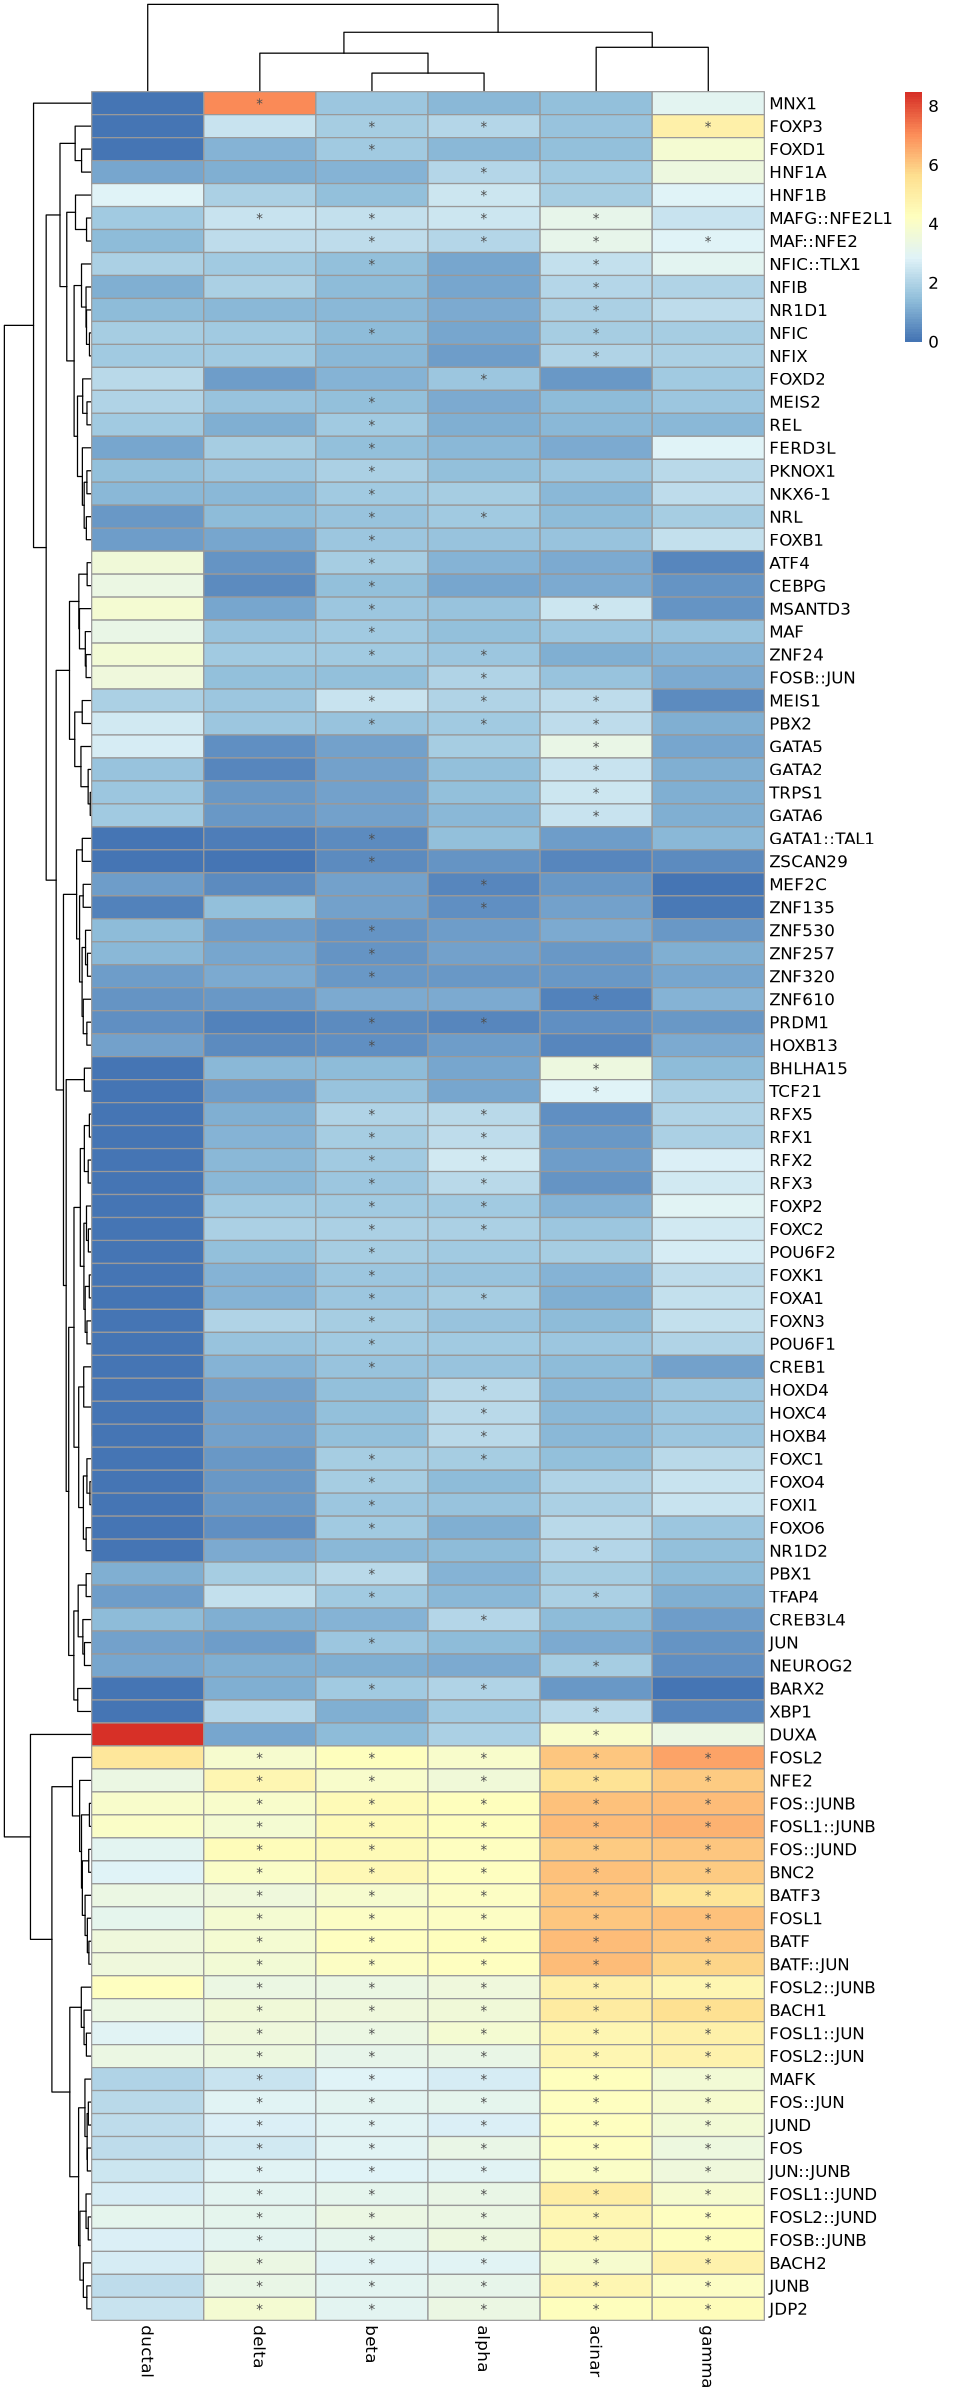

In [232]:
options(repr.plot.width=8, repr.plot.height=20)
pheatmap(heat_data[unique(filter(full.res, q.value < 0.05)$motif),], scale='none',
        display_numbers =heat_lab[unique(filter(full.res, q.value < 0.05)$motif),])